# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## VIII. Profils de production journaliers des vre

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [14]:
vre2017 = pd.read_csv("inputs/vre_profiles2017.csv")
vre2017.columns = ["vre", "heure", "prod"]

In [3]:
vre2016 = pd.read_csv("inputs/vre_profiles2016.csv")
vre2016.columns = ["vre", "heure", "prod"]
vre2015 = pd.read_csv("inputs/vre_profiles2015.csv")
vre2015.columns = ["vre", "heure", "prod"]
vre2014 = pd.read_csv("inputs/vre_profiles2014.csv")
vre2014.columns = ["vre", "heure", "prod"]
vre2013 = pd.read_csv("inputs/vre_profiles2013.csv")
vre2013.columns = ["vre", "heure", "prod"]
vre2012 = pd.read_csv("inputs/vre_profiles2012.csv")
vre2012.columns = ["vre", "heure", "prod"]
vre2011 = pd.read_csv("inputs/vre_profiles2011.csv")
vre2011.columns = ["vre", "heure", "prod"]
vre2010 = pd.read_csv("inputs/vre_profiles2010.csv")
vre2010.columns = ["vre", "heure", "prod"]

### 1. Utils

In [4]:
def Moyenne_jour(profil):
    heures, jours = np.shape(profil)
    moy_j = np.zeros(heures)
    for j in range(jours):
        for h in range(heures):
            moy_j[h] += profil[h,j]
    moy_j = moy_j/jours
    return moy_j

In [5]:
def Profils_journaliers(profil, vre, annee, verbose=False):
    if vre=="offshore":
        n=0
    elif vre=="onshore":
        n=8758
    elif vre=="pv":
        n=17518
        
    profil_jour = np.zeros((24,365))
    for j in range(365):
        for i in range(24):
            profil_jour[i,j] += [profil["prod"][(i+1)+j*24+n]]
            
    moy_jour = Moyenne_jour(profil_jour)
    plt.plot(moy_jour, label=annee)
    plt.title("Profil journalier de la production : " + vre)
    plt.xlabel("Heures")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
    if verbose :
        return profil_jour

In [9]:
def Affichage_annees(vre, Profils=Profils_journaliers):
    Profils(vre2017, vre, "2017")
    Profils(vre2016, vre, "2016")
    Profils(vre2015, vre, "2015")
    Profils(vre2014, vre, "2014")
    Profils(vre2013, vre, "2013")
    Profils(vre2012, vre, "2012")
    Profils(vre2011, vre, "2011")
    Profils(vre2010, vre, "2010")

### 2. Profils de l'éolien offshore

#### Profil journalier

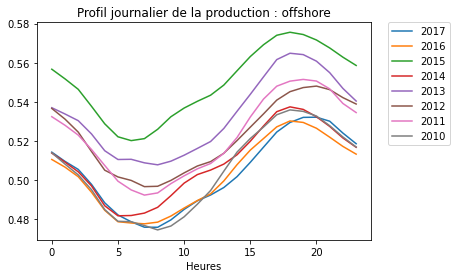

In [10]:
Affichage_annees("offshore")

### 3. Profils de l'éolien onshore

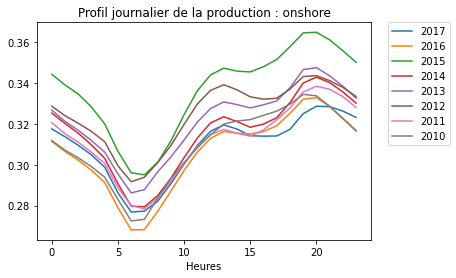

In [12]:
Affichage_annees('onshore')

### 4. Profils du solaire

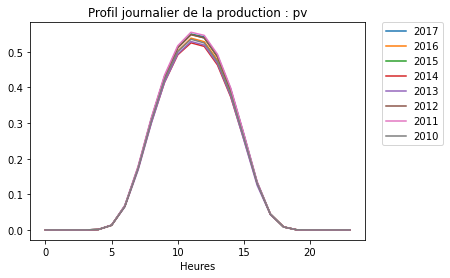

In [13]:
Affichage_annees('pv')